In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
from sklearn.multioutput import MultiOutputRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Data Loading

In [32]:
train_df=pd.read_csv("./dataset/train.csv")
test_df=pd.read_csv("./dataset/test.csv")

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Component1_fraction    2000 non-null   float64
 1   Component2_fraction    2000 non-null   float64
 2   Component3_fraction    2000 non-null   float64
 3   Component4_fraction    2000 non-null   float64
 4   Component5_fraction    2000 non-null   float64
 5   Component1_Property1   2000 non-null   float64
 6   Component2_Property1   2000 non-null   float64
 7   Component3_Property1   2000 non-null   float64
 8   Component4_Property1   2000 non-null   float64
 9   Component5_Property1   2000 non-null   float64
 10  Component1_Property2   2000 non-null   float64
 11  Component2_Property2   2000 non-null   float64
 12  Component3_Property2   2000 non-null   float64
 13  Component4_Property2   2000 non-null   float64
 14  Component5_Property2   2000 non-null   float64
 15  Comp

In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     500 non-null    int64  
 1   Component1_fraction    500 non-null    float64
 2   Component2_fraction    500 non-null    float64
 3   Component3_fraction    500 non-null    float64
 4   Component4_fraction    500 non-null    float64
 5   Component5_fraction    500 non-null    float64
 6   Component1_Property1   500 non-null    float64
 7   Component2_Property1   500 non-null    float64
 8   Component3_Property1   500 non-null    float64
 9   Component4_Property1   500 non-null    float64
 10  Component5_Property1   500 non-null    float64
 11  Component1_Property2   500 non-null    float64
 12  Component2_Property2   500 non-null    float64
 13  Component3_Property2   500 non-null    float64
 14  Component4_Property2   500 non-null    float64
 15  Compon

# 2. Model Training

In [39]:
X=train_df.iloc[:,:55]
y=train_df.iloc[:,-10:]# Last 10 columns are the target vairables

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using catboost

In [57]:
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_state=42
)
multi_model = MultiOutputRegressor(cat_model)
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"CatBoost MAPE: {mape:.4f}")

CatBoost MAPE: 0.8404


In [69]:

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees": ExtraTreesRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "KNeighbors": KNeighborsRegressor(),
    "SVR": SVR(),
    "XGBoost": XGBRegressor(verbosity=0),
    "LightGBM": LGBMRegressor(verbose=-1),
    "CatBoost": CatBoostRegressor(verbose=0)
}

results = {}

for name, model in models.items():
    wrapped_model = MultiOutputRegressor(model)
    wrapped_model.fit(X_train, y_train)
    y_pred = wrapped_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "MAPE": mape
    }

    print(
        f"{name} → "
        f"MAE: {mae:.4f}, "
        f"MSE: {mse:.4f}, "
        f"RMSE: {rmse:.4f}, "
        f"R2: {r2:.4f}, "
        f"MAPE: {mape:.4f}"
    )


LinearRegression → MAE: 0.2963, MSE: 0.1743, RMSE: 0.4174, R2: 0.8275, MAPE: 3.2206
Ridge → MAE: 0.3048, MSE: 0.1805, RMSE: 0.4248, R2: 0.8212, MAPE: 3.2988
Lasso → MAE: 0.7999, MSE: 0.9880, RMSE: 0.9940, R2: -0.0042, MAPE: 1.1405
ElasticNet → MAE: 0.7999, MSE: 0.9880, RMSE: 0.9940, R2: -0.0042, MAPE: 1.1405
DecisionTree → MAE: 0.4129, MSE: 0.3189, RMSE: 0.5647, R2: 0.6725, MAPE: 6.0674
RandomForest → MAE: 0.2678, MSE: 0.1339, RMSE: 0.3659, R2: 0.8628, MAPE: 4.2061
ExtraTrees → MAE: 0.2443, MSE: 0.1139, RMSE: 0.3376, R2: 0.8834, MAPE: 4.4528
GradientBoosting → MAE: 0.1870, MSE: 0.0651, RMSE: 0.2552, R2: 0.9336, MAPE: 1.8692
AdaBoost → MAE: 0.3446, MSE: 0.1969, RMSE: 0.4438, R2: 0.7985, MAPE: 5.1457
KNeighbors → MAE: 0.8071, MSE: 1.0241, RMSE: 1.0120, R2: -0.0428, MAPE: 8.8016
SVR → MAE: 0.6493, MSE: 0.6940, RMSE: 0.8331, R2: 0.2959, MAPE: 5.7494
XGBoost → MAE: 0.2036, MSE: 0.0785, RMSE: 0.2802, R2: 0.9196, MAPE: 4.1584
LightGBM → MAE: 0.1609, MSE: 0.0492, RMSE: 0.2218, R2: 0.9498, MAPE

In [70]:
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_state=42
)
multi_model = MultiOutputRegressor(cat_model)
multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"CatBoot → MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | R2: {r2:.4f} | MAPE: {mape:.4f}")

CatBoot → MAE: 0.1219 | MSE: 0.0318 | RMSE: 0.1784 | R2: 0.9679 | MAPE: 0.8404


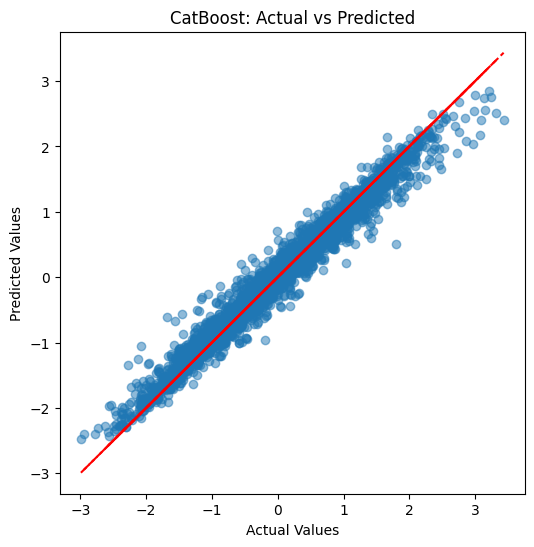

In [71]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("CatBoost: Actual vs Predicted")
plt.show()

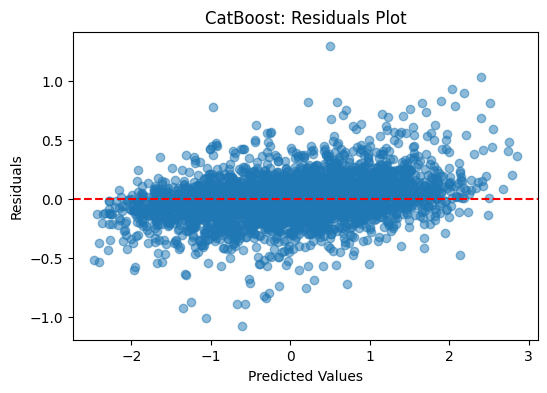

In [72]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("CatBoost: Residuals Plot")
plt.show()

In [62]:
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    random_state=42
)
multi_model = MultiOutputRegressor(cat_model)
multi_model.fit(X, y)
test_predictions_catboost = multi_model.predict(test_df.iloc[:, 1:56])
targets = y_train.columns 
predictions_catboost_df = pd.DataFrame(test_predictions_catboost, columns=targets)
final_output_catboost = pd.concat([test_df[['ID']].reset_index(drop=True), predictions_catboost_df.reset_index(drop=True)], axis=1)
final_output_catboost.to_csv("submission_catboost.csv", index=False)